# US Arrest Clustering Analysis 

[__GitHub Link__](https://github.com/CarlWSP/HyperionDev_taskL3T12/blob/master/US%20Arrest%20Clustering%20Analysis%20.ipynb)

In this project we will be analyzing the [US Arrest Challenge]( https://www.kaggle.com/datasets/kurohana/usarrets). This data set contains statistics on the arrests per 100,000 residents in US states in the year 1973. The dataset shows the arrests for `Assaults`, `Murders` and `Rapes`. The dataset also shows the percentage of the state’s population that live in urban areas. 

In this project we will look at how the percentage of Urban Population affected the rates of Murder Assault and Rape.

# Importing Data and Modules 

In [25]:
# data  
import numpy as np
import pandas as pd

# plot
import matplotlib.pyplot as plt
import seaborn as sns

# ml 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

### Importing Our DataFrame  

In [2]:
df = pd.read_csv('UsArrests.csv')

We will take a quick look at our data using the pandas head(), info() and describe() methods.

In [3]:
display(df.head(),df.info(),df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


None

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In our data we can see the following things 
- There are 5 columns and 50 rows
- The data is made up of `objects`, `floats` and `int`
- The `City` column can be made into the index
    - The `City` should also be labeled as `state`
- The values in `Assault` column is much larger than the other independent variables so sclaing the data will be helpful for our projct 

In [4]:
df = pd.read_csv('UsArrests.csv', index_col = 'City')

# Data Exploration 

We can start our exploration with looking at histograms of our 4 variables to see how the data is distributed. 

### Histograms 

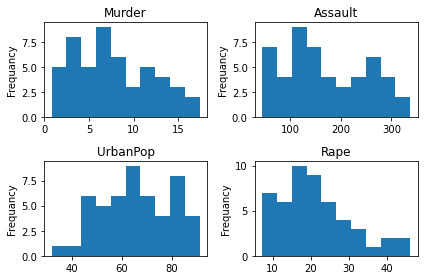

In [21]:
for i, j in enumerate(df, 1):
    plt.subplot(2,2,i)
    plt.hist(df[j])
    plt.ylabel('Frequancy')
    plt.title(j)


plt.tight_layout()
plt.show()

As we see in the 4 graphs above, our 4 variables are relatively evenly distributed. One thing to notice is how different the scale of values are between the variables, `Assault` especially has a x axis in the hundreds while the other have an x-axis in the tens.

### Correlation Coefficients 

The next step in our Data Exploration will be to look at how the variables correlate to each other. This can be done with the corr() method. The correlation coefficients can then be graphed using the Seaborn Heatmap method to show the relationships more clearly 

In [34]:
# correlations
corr = df.corr()
corr_df = pd.DataFrame(corr)

# masks to remove repeating values
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True

<AxesSubplot:>

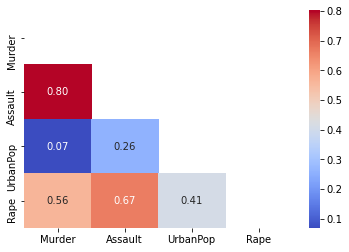

In [35]:
sns.heatmap(corr_df,annot=True, fmt=".2f", mask=dropSelf, cmap="coolwarm")

Looking at the coefficients above we can see there is a mix of weak and strong positive relationships. The strongest relationship is between `Murder` and `Assault` with 0.8 and the weakest is `UrbanPop` and `Murder` with 0.07. interestingly there is no negative correlations in this dataset. 

### Regresion Plots

As we were interested in looking at how `UrbanPop` affected the other 3 variables in the dataset we will separate the df into an X and y df. 

In [36]:
X = df[['Murder', 'Assault', 'Rape']]
y = df['UrbanPop']

To see how `UrbanPop` affects the other variables we will use the Seaborn regression plot method to plot scatter graphs and the line of best fit onto the graphs. 

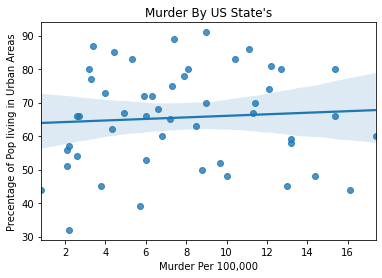

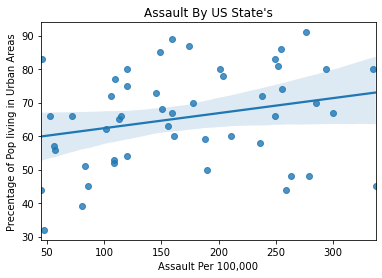

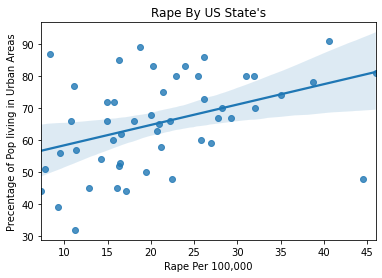

In [38]:
for i in X:
    sns.regplot(x = X[i], y = y)
    plt.title(i + ' By US State\'s')
    plt.xlabel(i + ' Per 100,000')
    plt.ylabel('Precentage of Pop living in Urban Areas')
    plt.show()

As we saw in our heatmap before all the relationships are positive. We see that `Murder` has a weak/no relationship while `Assault` and `Rape` have a more defined relationship. 

# PCA

Our DataFrame contains 200 data points, we can preform a PCA analysis to see of there is any redundancies in our data.

In [26]:
# import scaer 
scaler = StandardScaler()

# scale our dependant variabels 
pca_data  =scaler.fit_transform(X)

# Create instance  
pca = PCA(n_components = 3)

In [29]:
principal_components = pca.fit_transform(pca_data)
pca_df = pd.DataFrame(principal_components, index=df.index)

<AxesSubplot:>

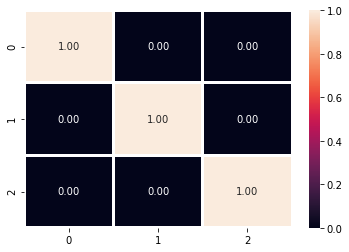

In [30]:
sns.heatmap(pca_df.corr(),annot=True, fmt=".2f", linewidth=2)

We can see that our PCA was able to successfully reduce the number of features down from 4 to 3. This was most likely achieved by combining the `Murder` and `Assault` variables. They had a strong positive correlation of 0.8 which was the strongest by far. 

However, as our DataFrame only contains 200 entries removing this relationship may not be worth it as we would be losing potentially valuable information. 

# K-Means

The next step for our analysis we will look at the K-means for our data. 

In [10]:
# Create ndarrays for each variable 
murder = df[['Murder', 'UrbanPop']].values.reshape(-1,2)
assault = df[['Assault', 'UrbanPop']].values.reshape(-1,2)
rape = df[['Rape', 'UrbanPop']].values.reshape(-1,2)

In [11]:
# scale our data 
murder = scaler.fit_transform(murder)
assault = scaler.fit_transform(assault)
rape = scaler.fit_transform(rape)

In [12]:
# create inscances of kmeans
k_means_murder  = KMeans(n_clusters = 5, init='k-means++', random_state=0)
k_means_assault = KMeans(n_clusters = 5, init='k-means++', random_state=0)
k_means_rape = KMeans(n_clusters = 5, init='k-means++', random_state=0)

# make predictions 
k_murder = k_means_murder.fit_predict(murder)
k_assault = k_means_assault.fit_predict(assault)
k_rape = k_means_rape.fit_predict(rape)

We can now check the silhouette scores for our model

In [13]:
print('Murder Silhouette Score: ',silhouette_score(murder, k_means_murder.labels_,metric='euclidean'))
print('Assault Silhouette Score: ',silhouette_score(assault, k_means_assault.labels_,metric='euclidean'))
print('Rape Silhouette Score: ',silhouette_score(rape, k_means_rape.labels_,metric='euclidean'))

Murder Silhouette Score:  0.3629188826233015
Assault Silhouette Score:  0.3912523814844078
Rape Silhouette Score:  0.3572717574827282


We can see that the silhouette scores are all positive showing that our clusters are relatively well defined. 

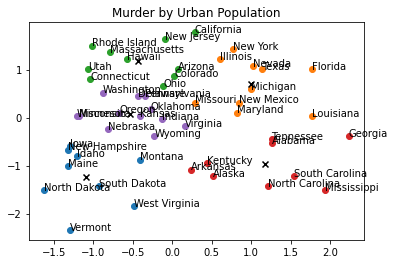

In [14]:
fig, ax = plt.subplots()
fig.figsize = (10,15)
# graph cluster
for i in range(0,5):
    
    plt.title('Murder by Urban Population')
    plt.scatter(murder[k_murder == i, 0], murder[k_murder == i, 1])
    
    # graph centers of clusters 
    plt.scatter(k_means_murder.cluster_centers_[i, 0], k_means_murder.cluster_centers_[i, 1], marker='x', c = 'black')

# graph name sof states 
for j, txt in enumerate(df.index):
    ax.annotate(txt, (murder[:,0][j], murder[:,1][j]))

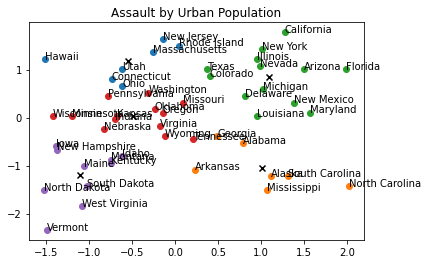

In [15]:
fig, ax = plt.subplots()
fig.figsize = (10,15)

for i in range(0,5):
    plt.title('Assault by Urban Population')
    plt.scatter(assault[k_assault == i, 0], assault[k_assault == i, 1])
    plt.scatter(k_means_assault.cluster_centers_[i, 0], k_means_assault.cluster_centers_[i, 1], marker='x', c = 'black')

for j, txt in enumerate(df.index):
    ax.annotate(txt, (assault[:,0][j], assault[:,1][j]))

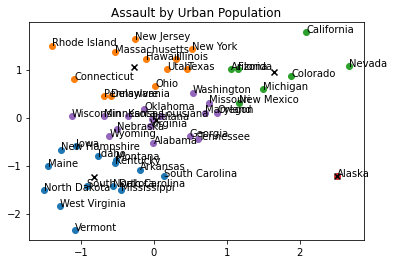

In [16]:
fig, ax = plt.subplots()
fig.figsize = (10,15)

for i in range(0,5):
    plt.title('Assault by Urban Population')
    plt.scatter(rape[k_rape == i, 0], rape[k_rape == i, 1])
    plt.scatter(k_means_rape.cluster_centers_[i, 0], k_means_rape.cluster_centers_[i, 1], marker='x', c = 'black')

for j, txt in enumerate(df.index):
    ax.annotate(txt, (rape[:,0][j], rape[:,1][j]))

When looking at the clusters above we can see that:
- California, Texas, Florida and New York are the most populated states and they are mostly grouped together 
- States with low populations such as Vermont, West Virginia. Main are grouped together. 
- In the Assault graph we see that Alaska is their own cluster. This is because Alaska is the most dangerous [state](https://www.businessinsider.com/why-is-alaska-so-dangerous-2014-8)


## Dendrogram

For the last part of our analysis, we are going to create Dendrograms. We are going to check what combination of linkage methods and distance metrics produces the most balanced dendrograms. 

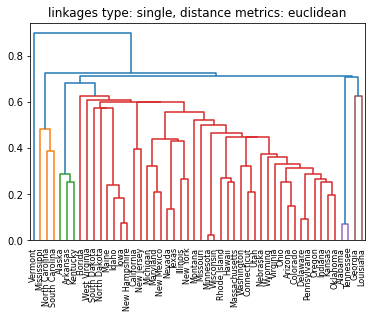

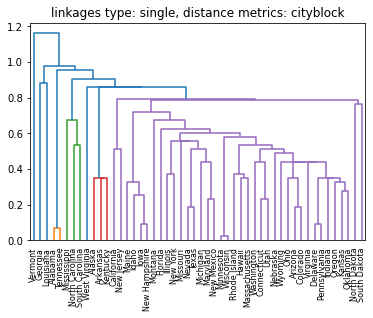

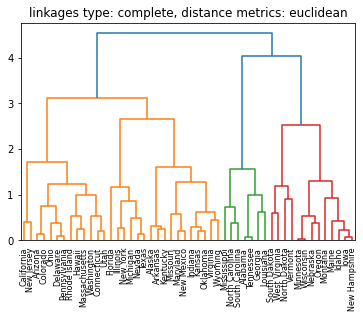

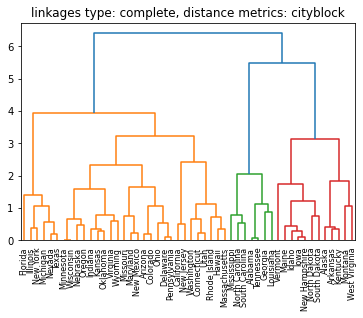

In [33]:
linkages_types = ['single', 'complete']
distance_metrics = ['euclidean', 'cityblock']

for i in linkages_types:
    for j in distance_metrics:
        dend = dendrogram(linkage(murder, method=i, metric=j),labels = df.index)  
        plt.title('linkages type: ' + i + ', distance metrics: ' + j)
        plt.show()

We can see that the combination of Complete Linkage and Euclidean distance results in the most balanced Dendrograms. We will now cerate 3 dendrograms to check how they are clustered together. 

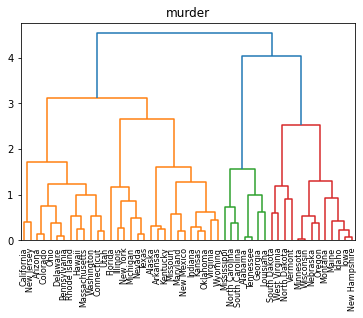

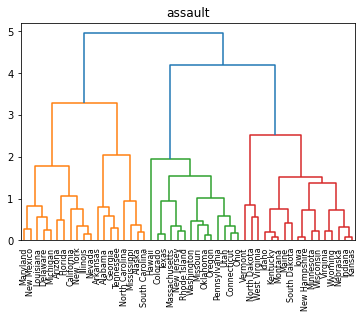

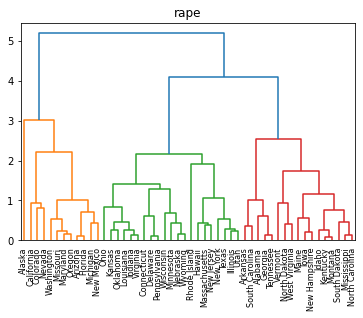

In [18]:
numpy_list = [murder, assault, rape]
title_list = ['murder', 'assault', 'rape']
for i, j in zip(numpy_list, title_list):
    dend = dendrogram(linkage(i, method='complete', metric='euclidean'),labels = df.index)  
    plt.title(j)
    plt.show()

- In the murder Dendrogram interestingly we see that the US “South” got clustered together in the green group and many of the extreme north got grouped together in the red group. 
- In the assault graph we see states with the highest GDP grouped together like California, New York and Florida and low GDP such as Vermont, Wyoming and New Hampshire are clustered together. 
- Lastly in the Rape graph we see that the most populated state is most closely linked to the second east populated state being Alaska. This is most likely due to Alaska being the most dangerous state.